In [10]:
import pandas as pd
import numpy as np
file_path = 'tech_mahindra.csv'
df = pd.read_csv(file_path)
df=df.iloc[0:-7]
removecolumns=[0,1,2,10,11,12,13,14]
df=df.drop(df.columns[removecolumns],axis=1)
df.head()
data_matrix=df.to_numpy()
column6_index=5
column7_index=6
data_matrix[ :,[column6_index,column7_index]]=data_matrix[ :,[column7_index,column6_index]]
print(data_matrix.shape)
print(data_matrix[:5, :])
# data matrix contains seven columns comprising of previous closing price ,opening price , high price , low price, last price , vwap, closing price respectively.

(242, 7)
[['1,006.35     ' '1,010.00     ' '1,013.50     ' '997.30      '
  '1,001.25     ' '1,004.27       ' '1,001.55      ']
 ['1,001.55     ' '1,004.45     ' '1,009.00     ' '986.30      '
  '1,002.80     ' '998.08         ' '1,003.15      ']
 ['1,003.15     ' '1,008.20     ' '1,035.75     ' '1,003.25    '
  '1,034.00     ' '1,024.66       ' '1,034.45      ']
 ['1,034.45     ' '1,034.00     ' '1,050.00     ' '1,030.90    '
  '1,046.00     ' '1,041.45       ' '1,046.05      ']
 ['1,046.05     ' '1,046.05     ' '1,051.50     ' '1,043.50    '
  '1,047.50     ' '1,047.97       ' '1,048.35      ']]


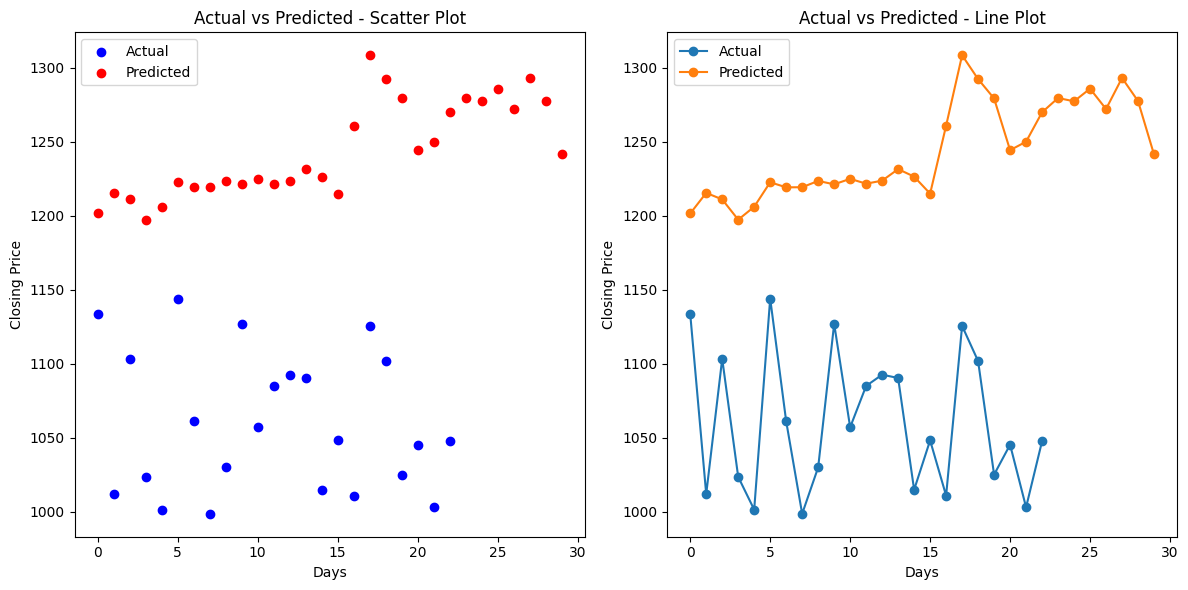

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the NumPy array to a Pandas DataFrame
columns = ['Prev_Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Close']
df = pd.DataFrame(data_matrix, columns=columns)

# Data Cleaning: Convert string representations to floats
for col in columns:
    if df[col].dtype == 'O':  # Check if the column contains objects (strings)
        df[col] = df[col].str.replace(',', '').astype(float)

# Separate independent variables (X) and dependent variable (y)
X = df.iloc[:, :-1].values  # Independent variables
y = df.iloc[:, -1].values   # Dependent variable

# Split the dataset into training and testing sets (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X[:90, :], y[:90], test_size=0.25, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model on the remaining 30 days
y_pred = model.predict(X[-30:, :])

# Plotting predicted vs actual data
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test[-30:])), y_test[-30:], label='Actual', color='blue')
plt.scatter(range(len(y_pred[-30:])), y_pred[-30:], label='Predicted', color='red')
plt.title('Actual vs Predicted - Scatter Plot')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()

# Line plot
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test[-30:])), y_test[-30:], label='Actual', marker='o')
plt.plot(range(len(y_pred[-30:])), y_pred[-30:], label='Predicted', marker='o')
plt.title('Actual vs Predicted - Line Plot')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()







In [ ]:
# Prediction function
def predict_closing_price(prev_close, open_price, high, low, last, vwap):
    input_data = np.array([[prev_close, open_price, high, low, last, vwap]])
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage of the prediction function
user_input = [float(input(f"Enter {column}: ")) for column in columns[:-1]]
predicted_closing_price = predict_closing_price(*user_input)

print(f"Predicted Closing Price: {predicted_closing_price}")